In [1]:
# Install necessary libraries
!pip install scikit-learn imbalanced-learn

In [2]:
# Import Data
import pandas as pd
import numpy as np

In [3]:
 # Filter out warnings
import warnings
warnings.filterwarnings('ignore')
print(np.log(0))

-inf


In [4]:
df=pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [7]:
# Null Value Treatment
for i in df.columns:
    if df[i].dtypes=='object':
      df[i]=df[i].fillna(df[i].mode()[0])
    else:
      df[i]=df[i].fillna(df[i].mean())

<Axes: >

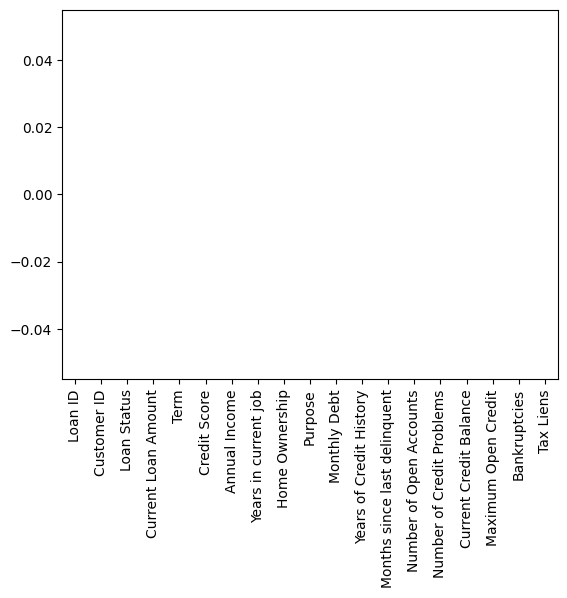

In [8]:
df.isnull().sum().plot(kind='bar')

In [9]:
# Separate X and Y
X=df.drop(['Loan Status','Loan ID','Customer ID'],axis=1)
Y=df[['Loan Status']]

In [10]:
# Check whether output is biased or not
df['Loan Status'].value_counts()

,count
Loan Status,
Fully Paid,77875
Charged Off,22639


In [11]:
# Separate cat and con from X
cat=[]
con=[]
for i in X.columns:
  if X[i].dtypes==object:
    cat.append(i)
  else:
    con.append(i)

In [12]:
Xcat=X[cat]
Xcon=X[con]

In [13]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [14]:
# Feature Encoding
le=LabelEncoder()
for i in Xcat.columns:
  Xcat[i]=le.fit_transform(Xcat[i])

In [15]:
# Feature Encoding
ss= StandardScaler()
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [16]:
X=Xcon.join(Xcat)
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose
0,-0.356914,-0.277703,-0.217347,-1.091727e+00,-1.427889e-01,-4.730770e-16,-1.026318,1.727409e+00,-0.177096,-0.041140,2.519557,-1.138334e-01,1,8,1,5
1,-0.362689,0.000000,0.000000,1.220673e+00,4.145666e-01,-1.791081e+00,4.777142,-3.495776e-01,-0.172336,0.010760,-0.336242,-1.138334e-01,1,1,1,3
2,2.783370,-0.253520,0.880194,8.834262e-01,-4.714858e-01,-3.929080e-01,1.375114,1.727409e+00,0.008951,-0.001280,-0.336242,-1.138334e-01,1,8,2,3
3,-0.359997,-0.268634,-0.589117,-8.012766e-01,-8.859297e-01,-4.730770e-16,-0.425960,-3.495776e-01,-0.102100,-0.044702,-0.336242,-1.138334e-01,0,3,2,3
4,-0.365405,0.000000,0.000000,1.784692e-01,-1.729109e+00,-4.730770e-16,0.774756,-3.495776e-01,-0.109746,-0.039893,-0.336242,-1.138334e-01,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,1,1,1,3
100510,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,1,1,1,3
100511,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,1,1,1,3
100512,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,1,1,1,3


In [17]:
# Label Encode Y since  it is a categorical output with related categoric outputs.
Y=le.fit_transform(Y)
Y=pd.DataFrame(Y,columns=['Loan Status'])
Y

,Loan Status
0,1
1,1
2,1
3,1
4,1
...,...
100509,1
100510,1
100511,1
100512,1


In [18]:
# Remove outliers and reset the index.
out=[]
for i in Xcon.columns:
  o1=Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
  out.extend(o1)
out=list(set(out))

In [19]:
print(out)

[32768, 1, 32770, 98306, 5, 98311, 32776, 98315, 65547, 65552, 65553, 32787, 98325, 32791, 24, 29, 65566, 32801, 65570, 98337, 32804, 98341, 98342, 32809, 65577, 43, 98347, 46, 98352, 65584, 51, 98355, 98356, 54, 65591, 56, 65593, 32829, 63, 65, 65603, 32838, 98374, 65610, 74, 76, 65612, 65614, 77, 65618, 98388, 32853, 87, 98393, 32858, 98396, 32860, 96, 97, 32866, 32867, 103, 65644, 98414, 32879, 65648, 98416, 32882, 117, 65654, 118, 32888, 65663, 65664, 32900, 65669, 98439, 65673, 32906, 32905, 65677, 65679, 98451, 32917, 151, 32919, 157, 98462, 32927, 160, 161, 32928, 32929, 165, 98470, 169, 32945, 98482, 32948, 180, 98496, 32961, 200, 65742, 98511, 65747, 216, 32984, 65753, 98522, 65756, 221, 32989, 32994, 98533, 32998, 33000, 98538, 65771, 238, 241, 65778, 98548, 248, 65785, 33018, 33020, 98558, 257, 98562, 33031, 65804, 98575, 33043, 276, 98580, 98585, 33049, 98587, 98588, 33053, 65826, 98595, 98601, 33066, 300, 33070, 303, 306, 307, 65843, 33074, 311, 312, 98617, 98620, 321, 658

In [20]:
X=X.drop(index=out,axis=0)
Y=Y.drop(index=out,axis=0)

In [21]:
X.shape

(88034, 16)

In [22]:
Y.shape

(88034, 1)

In [23]:
 #  Reduce biasedness of data using SMOTE
from imblearn.over_sampling import SMOTE

In [24]:
X_smote,Y_smote=SMOTE().fit_resample(X,Y)

In [25]:
Y_smote.value_counts()

,count
Loan Status,
0,71420
1,71420


In [26]:
Y_smote=pd.DataFrame(Y_smote,columns=['Loan Status'])
Y

,Loan Status
0,1
2,1
3,1
4,1
6,1
...,...
100509,1
100510,1
100511,1
100512,1


In [27]:
# Perform train test split
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
#  Feature Selection
# Sequential Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
sfs=SequentialFeatureSelector(model,n_features_to_select= 'auto',direction='forward',cv=4)
sfs.fit(X_smote,Y_smote)

In [ ]:
# Show the list of selected features
print("Selected Features are:", sfs.get_support(indices = True))

In [ ]:
# Display the names of the selected features
selected_features = X_smote.columns[sfs.get_support()]
print("Selected features are:",selected_features)

In [ ]:
#  Create graphs of various columns
from matplotlib.pyplot import plot,show
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
for i in con:
  sns.boxplot(x=Y_smote['Loan Status'],y=X_smote[i].head(100))
  plt.title(f'Boxplot of {i}')
  show()

In [ ]:
for i in con:
  sns.histplot(x=X_smote[i].head(100),hue=Y_smote['Loan Status'],kde=True)
  plt.title(f'Histogram of {i}')
  show()

In [ ]:
for i in cat:
  x=X_smote[i].head(100).value_counts()
  plt.pie(x,labels=x.index,autopct='%1.1f%%')
  plt.title(f'Pie chart of {i}')
  plt.show()

In [ ]:
lr=LogisticRegression()
model=lr.fit(X_smote,Y_smote)
Ypred_train=model.predict(X_smote)
Ypred_test=model.predict(Xtest)

In [ ]:
# Error Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("Training accuracy score is",accuracy_score(Y_smote,Ypred_train))
print("Testing accuracy score is",accuracy_score(Ytest,Ypred_test))
print('***')
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))

In [ ]:
# Choosing the corrrect algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtc=DecisionTreeClassifier(max_depth=3)
rfc=RandomForestClassifier(n_estimators=10)

In [41]:
# Define the model DTC
sfs=SequentialFeatureSelector(model,n_features_to_select='auto',direction='forward',cv=4)
sfs.fit(X_smote,Y_smote)
model=DecisionTreeClassifier(max_depth=3)

In [42]:
print("Selected features are:",sfs.get_support(indices=True))

Selected features are: [ 1  3  5  6  7 10 11 13]


In [43]:
# Error Evaluation
print("Training accuracy score is",accuracy_score(Y_smote,Ypred_train))
print("Testing accuracy score is",accuracy_score(Ytest,Ypred_test))
print('***')
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))

Training accuracy score is 0.6350042005040605
Testing accuracy score is 0.5698869767706026
***
Training confusion matrix is [[52756 18664]
 [33472 37948]]
Testing confusion matrix is [[2316  962]
 [6611 7718]]


In [44]:
# Define the model RFC
sfs=SequentialFeatureSelector(model,n_features_to_select='auto',direction='forward',cv=4)
sfs.fit(X_smote,Y_smote)
model=RandomForestClassifier(n_estimators=10)

In [ ]:
print("Selected features are:",sfs.get_support(indices=True))

In [ ]:
# Error Evaluation
print("Training accuracy score is",accuracy_score(Y_smote,Ypred_train))
print("Testing accuracy score is",accuracy_score(Ytest,Ypred_test))
print('***')
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))

In [ ]:
# Checking all algorithms with Ada Boost
from sklearn.ensemble import AdaBoostClassifier
d1=[lr,dtc,rfc]
for i in d1:
  adc=AdaBoostClassifier(i,n_estimators=10)
  model=adc.fit(X_smote,Y_smote)
  Ypred_train=model.predict(X_smote)
  Ypred_test=model.predict(Xtest)
  print(f"**{i}**")
  print('Training Accuracy is',accuracy_score(Y_smote,Ypred_train))
  print('Testing accuracy is',accuracy_score(Ytest,Ypred_test))
  print("****")
  print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
  print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))
  print("****")

In [48]:
# Finalizing RFC algorithm with AdaBoostClassifier
adc=AdaBoostClassifier(rfc,n_estimators=10)
model=adc.fit(X_smote,Y_smote)

In [49]:
Ypred_train=model.predict(X_smote)
Ypred_test=model.predict(Xtest)
print('Training Accuracy is',accuracy_score(Y_smote,Ypred_train))
print('Testing accuracy is',accuracy_score(Ytest,Ypred_test))
print("****")
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))
print("****")

Training Accuracy is 1.0
Testing accuracy is 1.0
****
Training confusion matrix is [[71420     0]
 [    0 71420]]
Testing confusion matrix is [[ 3278     0]
 [    0 14329]]
****


In [50]:
# Predictions
df1=pd.read_csv('credit_test.csv')
df1.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [51]:
# Nul value treatment
for i in df1.columns:
  if df1[i].dtypes=='object':
    df1[i]=df1[i].fillna(df1[i].mode()[0])
  else:
    df1[i]=df1[i].fillna(df1[i].mean())

<Axes: >

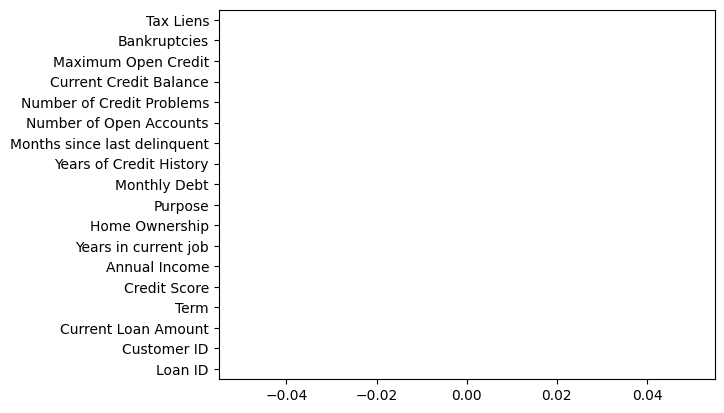

In [52]:
df1.isnull().sum().plot(kind='barh')

In [53]:
X1=df1[selected_features]

In [54]:
#Preprocessing the testing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [55]:
# Separate cat and con from X1
cat=[]
con=[]
for i in X1.columns:
  if X1[i].dtypes==object:
    cat.append(i)
  else:
    con.append(i)

In [56]:
X1cat=X1[cat]
X1con=X1[con]

In [57]:
#  Feature Encoding
# Label Encoding
le = LabelEncoder()
for i in X1cat.columns:
  X1cat[i]=le.fit_transform(X1cat[i])

In [58]:
# Feature Scaling
# Standard Scaling
ss=StandardScaler()
X1con=pd.DataFrame(ss.fit_transform(X1con),columns=con)

In [59]:
# Merge X1cat and X1con into X1
X1=X1con.join(X1cat)
X1.head()

,Credit Score,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Years in current job
0,-0.254565,1.934263,0.000000,-0.422160,-0.336180,-0.338690,-0.108756,1
1,-0.264563,1.493070,0.000000,-0.017035,-0.336180,-0.338690,-0.108756,1
2,-0.283791,-0.823719,-1.713444,-0.219598,-0.336180,-0.338690,-0.108756,2
3,-0.269947,-0.136040,-0.546652,0.995776,1.695121,2.572117,-0.108756,1
4,-0.256872,1.727302,0.620141,0.590652,-0.336180,-0.338690,-0.108756,1


In [60]:
# One hot encode categorical data
X1=pd.get_dummies(X1,columns=cat)
X1.head()

,Credit Score,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Years in current job_0,Years in current job_1,Years in current job_2,Years in current job_3,Years in current job_4,Years in current job_5,Years in current job_6,Years in current job_7,Years in current job_8,Years in current job_9,Years in current job_10
0,-0.254565,1.934263,0.000000,-0.422160,-0.336180,-0.338690,-0.108756,False,True,False,False,False,False,False,False,False,False,False
1,-0.264563,1.493070,0.000000,-0.017035,-0.336180,-0.338690,-0.108756,False,True,False,False,False,False,False,False,False,False,False
2,-0.283791,-0.823719,-1.713444,-0.219598,-0.336180,-0.338690,-0.108756,False,False,True,False,False,False,False,False,False,False,False
3,-0.269947,-0.136040,-0.546652,0.995776,1.695121,2.572117,-0.108756,False,True,False,False,False,False,False,False,False,False,False
4,-0.256872,1.727302,0.620141,0.590652,-0.336180,-0.338690,-0.108756,False,True,False,False,False,False,False,False,False,False,False


In [61]:
#Reorder the X1 and X_smote columns
X1_cols=set(X1.columns)
X_smote_cols= set(X_smote.columns)

In [62]:
#Adding missing columns toX1
missing_cols=list(X_smote_cols-X1_cols)
for col in missing_cols:
  X1[col]=0

In [63]:
# Removing extra columns from X1
extra_col=list(X1_cols- X_smote_cols)
X1.drop(extra_col, axis=1, inplace=True)

In [64]:
X1=X1[X_smote.columns]
X1.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose
0,0,-0.254565,0,1.934263,0,0.000000,-0.422160,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0
1,0,-0.264563,0,1.493070,0,0.000000,-0.017035,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0
2,0,-0.283791,0,-0.823719,0,-1.713444,-0.219598,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0
3,0,-0.269947,0,-0.136040,0,-0.546652,0.995776,1.695121,0,0,2.572117,-0.108756,0,0,0,0
4,0,-0.256872,0,1.727302,0,0.620141,0.590652,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0


In [65]:
#  Predictions
predictions=model.predict(X1)
print(predictions)

[1 1 1 ... 1 1 1]


In [66]:
X1['Loan Status']=predictions
X1.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose,Loan Status
0,0,-0.254565,0,1.934263,0,0.000000,-0.422160,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1
1,0,-0.264563,0,1.493070,0,0.000000,-0.017035,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1
2,0,-0.283791,0,-0.823719,0,-1.713444,-0.219598,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1
3,0,-0.269947,0,-0.136040,0,-0.546652,0.995776,1.695121,0,0,2.572117,-0.108756,0,0,0,0,1
4,0,-0.256872,0,1.727302,0,0.620141,0.590652,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1


In [67]:
# Ading a column Id
X1['Id']=(X1.index)+1
X1.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose,Loan Status,Id
0,0,-0.254565,0,1.934263,0,0.000000,-0.422160,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1,1
1,0,-0.264563,0,1.493070,0,0.000000,-0.017035,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1,2
2,0,-0.283791,0,-0.823719,0,-1.713444,-0.219598,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1,3
3,0,-0.269947,0,-0.136040,0,-0.546652,0.995776,1.695121,0,0,2.572117,-0.108756,0,0,0,0,1,4
4,0,-0.256872,0,1.727302,0,0.620141,0.590652,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0,1,5


In [68]:
# Creating a new dataframe havinng only Id and Loan Status
df2=X1[['Id','Loan Status']]
df2

,Id,Loan Status
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
10348,10349,1
10349,10350,1
10350,10351,1
10351,10352,1


In [69]:
# Replace loan status from 1 and  0 to Fully Paid and Charged Off respectively.
df2['Loan Status']=df2['Loan Status'].replace({1:'Fully Paid',0:'Charged Off'})
df2

,Id,Loan Status
0,1,Fully Paid
1,2,Fully Paid
2,3,Fully Paid
3,4,Fully Paid
4,5,Fully Paid
...,...,...
10348,10349,Fully Paid
10349,10350,Fully Paid
10350,10351,Fully Paid
10351,10352,Fully Paid


In [70]:
# Export data
df2.to_csv('Loan Status Predictions.csv', index=False)

In [71]:
# Verify whether data got imported or not
df2.to_verify = pd.read_csv('Loan Status Predictions.csv')
df2.to_verify.head()

,Id,Loan Status
0,1,Fully Paid
1,2,Fully Paid
2,3,Fully Paid
3,4,Fully Paid
4,5,Fully Paid
